(1) 데이터 가져오기
터미널에서 ~/data/data/bike-sharing-demand 경로에 train.csv 데이터를 train 변수로 가져 옵니다.

In [185]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split

data = pd.read_csv('train.csv')
train, test = data.drop('count', axis=1), data['count']

(2) datetime 컬럼을 datetime 자료형으로 변환하고 연, 월, 일, 시, 분, 초까지 6가지 컬럼 생성하기
to_datetime 활용 : 링크 참조
pandas datetime extract year month day 키워드로 검색해 보기

In [186]:
date_time = train['datetime'].apply(pd.to_datetime)

In [187]:
train['year'] = date_time.apply(lambda x:x.year)
train['month'] = date_time.apply(lambda x:x.month)
train['day'] = date_time.apply(lambda x:x.day)
train['hour'] = date_time.apply(lambda x:x.hour)
train['minute'] = date_time.apply(lambda x:x.minute)
train['second'] = date_time.apply(lambda x:x.second)
train.head()
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  year        10886 non-null  int64  
 12  month       10886 non-null  int64  
 13  day         10886 non-null  int64  
 14  hour        10886 non-null  int64  
 15  minute      10886 non-null  int64  
 16  second      10886 non-null  int64  
dtypes: float64(3), int64(13), object(1)
memory usage: 1.4+ MB


(3) year, month, day, hour, minute, second 데이터 개수 시각화하기
sns.countplot 활용해서 시각화하기
subplot을 활용해서 한 번에 6개의 그래프 함께 시각화하기

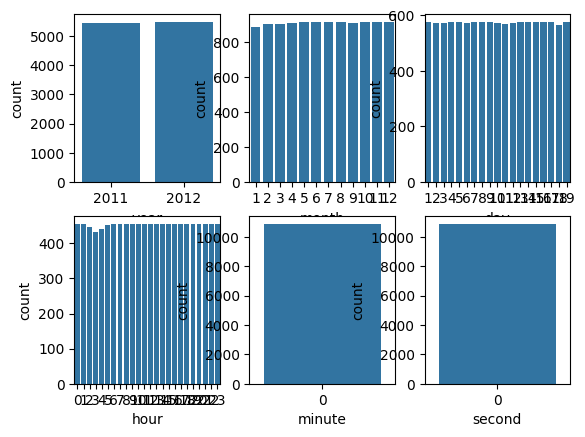

In [188]:
fig = plt.figure()
ax1 = fig.add_subplot(2, 3, 1)
ax1 = sns.countplot(train, x='year')
ax2 = fig.add_subplot(2, 3, 2)
ax2 = sns.countplot(train, x='month')
ax3 = fig.add_subplot(2, 3, 3)
ax3 = sns.countplot(train, x='day')
ax4 = fig.add_subplot(2, 3, 4)
ax4 = sns.countplot(train, x='hour')
ax5 = fig.add_subplot(2, 3, 5)
ax5 = sns.countplot(train, x='minute')
ax6 = fig.add_subplot(2, 3, 6)
ax6 = sns.countplot(train, x='second')

In [189]:
features = ["year", "month", "day", "hour", "minute", "second",
        "season", "holiday", "workingday", "weather",
        "temp", "atemp", "windspeed", "humidity"]
target = ['count']

X = train[features]
y = test
X.head()

,year,month,day,hour,minute,second,season,holiday,workingday,weather,temp,atemp,windspeed,humidity
0,2011,1,1,0,0,0,1,0,0,1,9.84,14.395,0.0,81
1,2011,1,1,1,0,0,1,0,0,1,9.02,13.635,0.0,80
2,2011,1,1,2,0,0,1,0,0,1,9.02,13.635,0.0,80
3,2011,1,1,3,0,0,1,0,0,1,9.84,14.395,0.0,75
4,2011,1,1,4,0,0,1,0,0,1,9.84,14.395,0.0,75


(4) X, y 컬럼 선택 및 train/test 데이터 분리
X(feature) 에는 어떤 데이터 컬럼을 넣어야 될지 고민해 봅시다 데이터 컬럼을 추가하거나 빼면서 잘 조합하여 데이터를 넣기 바랍니다. 만일 모든 데이터 컬럼(특징)을 넣는다면 오차 값이 말도 안 되게 적게 나올 수도 있습니다. ex) count를 예측하는데 casual,registered 컬럼이 필요할까요?

count 값을 맞추고자 하므로, y 변수에 count 컬럼의 데이터 넣기

In [190]:
X_train, X_test, y_train, y_test = train_test_split(X, y)

(5) LinearRegression 모델 학습
sklearn의 LinearRegression 모델 불러오기 및 학습하기

In [191]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)

predict = model.predict(X_test)

(6) 학습된 모델로 X_test에 대한 예측값 출력 및 손실함수값 계산
학습된 모델에 X_test를 입력해서 예측값 출력하기
모델이 예측한 값과 정답 target 간의 손실함수 값 계산하기
mse 값과 함께 rmse 값도 계산하기

In [192]:
from sklearn.metrics import mean_squared_error, root_mean_squared_error

mse = mean_squared_error(y_test, predict)
rmse = root_mean_squared_error(y_test, predict)
print(mse)
print(rmse)

19546.642749358172
139.8093085218512


(7) x축은 temp 또는 humidity로, y축은 count로 예측 결과 시각화하기
x축에 X 데이터 중 temp 데이터를, y축에는 count 데이터를 넣어서 시각화하기
x축에 X 데이터 중 humidity 데이터를, y축에는 count 데이터를 넣어서 시각화하기

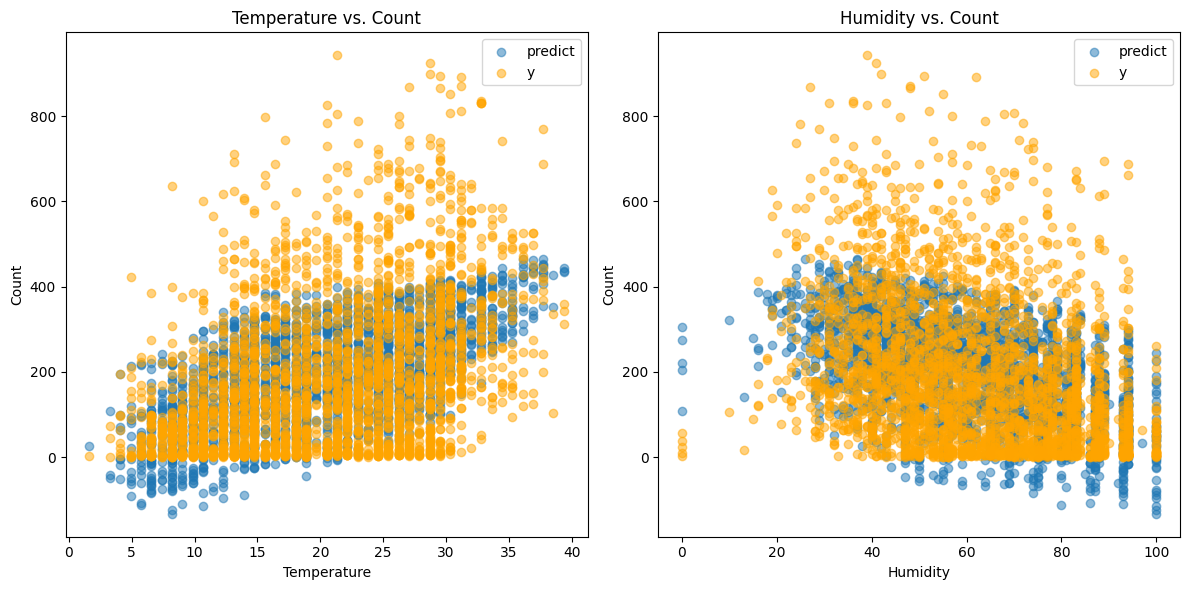

In [193]:
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.scatter(X_test['temp'], predict, alpha=0.5, label='predict')
plt.scatter(X_test['temp'], y_test, color='orange', alpha=0.5, label='y')
plt.xlabel('Temperature')
plt.ylabel('Count')
plt.legend()
plt.title('Temperature vs. Count')

plt.subplot(1, 2, 2)
plt.scatter(X_test['humidity'], predict, alpha=0.5, label='predict')
plt.scatter(X_test['humidity'], y_test, color='orange', alpha=0.5, label='y')
plt.xlabel('Humidity')
plt.ylabel('Count')
plt.legend()
plt.title('Humidity vs. Count')

plt.tight_layout()
plt.show()